In [4]:
from prophet import Prophet

In [6]:
import pandas as pd

In [7]:
from prophet.plot import add_changepoints_to_plot,plot_plotly,plot_components_plotly

In [34]:
import matplotlib.pyplot as plt

In [26]:
# Read the data from a CSV file
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Bearing_Area.csv')
df_1= pd.read_csv(r'C:\Users\ADMIN\Desktop\Coffee_Productivity.csv')

In [24]:
df.head()

,ds,y
0,01-10-1985,108476
1,01-10-1986,108500
2,01-10-1987,108500
3,01-10-1988,108500
4,01-10-1989,108500


<AxesSubplot:xlabel='ds'>

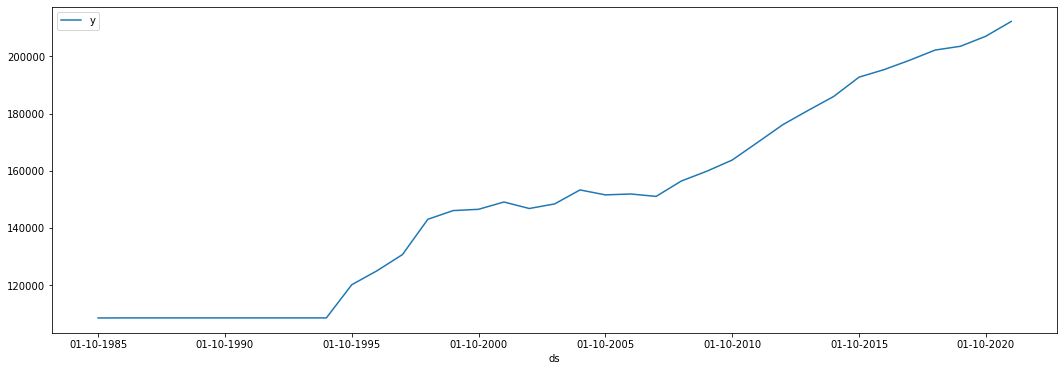

In [25]:
df.plot(x='ds',y='y',figsize=(18,6))

<AxesSubplot:xlabel='ds'>

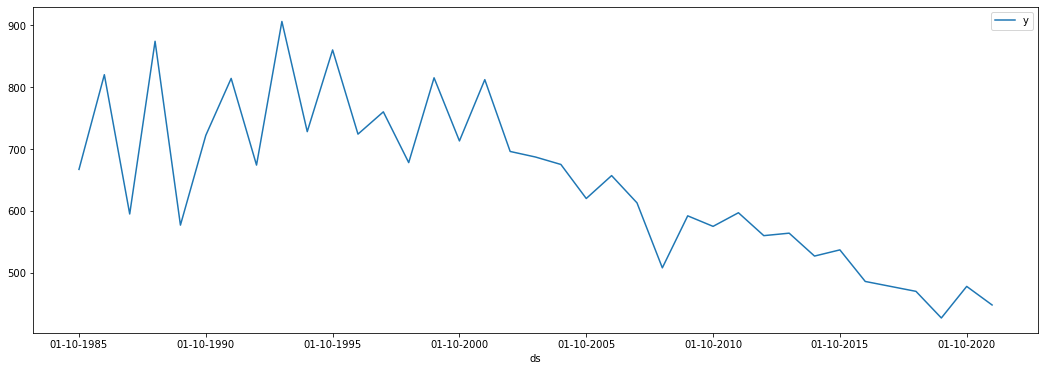

In [27]:
df_1.plot(x='ds',y='y',figsize=(18,6))

In [30]:
model = Prophet()
model.fit(df)


18:45:06 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing


1    1986-01-10
2    1987-01-10
3    1988-01-10
4    1989-01-10
6    1991-01-10
7    1992-01-10
8    1993-01-10
9    1994-01-10
10   1995-01-10
11   1996-01-10
12   1997-01-10
13   1998-01-10
15   2000-01-10
16   2001-01-10
17   2002-01-10
18   2003-01-10
19   2004-01-10
20   2005-01-10
21   2006-01-10
22   2007-01-10
24   2009-01-10
25   2010-01-10
26   2011-01-10
27   2012-01-10
28   2013-01-10
Name: ds, dtype: datetime64[ns]


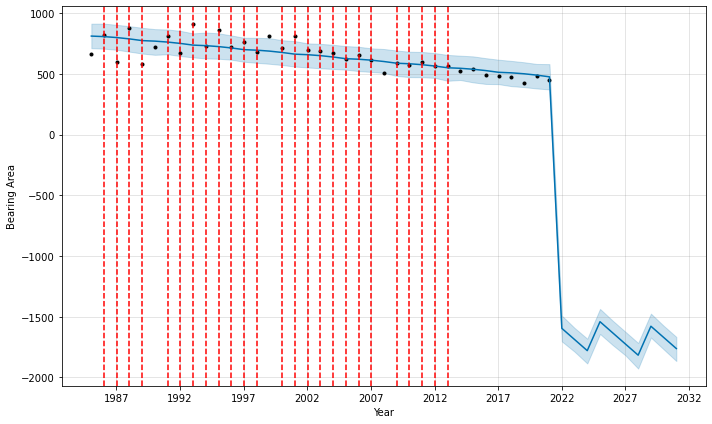

In [39]:
# Generate changepoint statistics
changepoints = model.changepoints

# Print the changepoints
print(changepoints)

# Plot the changepoints
fig = model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Bearing Area')

# Add vertical lines at the changepoints
for changepoint in changepoints:
    plt.axvline(changepoint, linestyle='--', color='r')

plt.show()

In [36]:
future_dates = model.make_future_dataframe(periods=10, freq='Y')


In [37]:
forecast = model.predict(future_dates)


In [42]:
# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds         yhat   yhat_lower   yhat_upper
0  1985-01-10   810.367424   710.587577   912.567277
1  1986-01-10   805.997400   706.770061   912.759361
2  1987-01-10   798.263545   697.448131   902.880513
3  1988-01-10   787.163365   682.334233   891.907303
4  1989-01-10   773.169883   666.644288   878.570905
5  1990-01-10   768.799860   656.070798   867.626027
6  1991-01-10   761.066004   660.971355   864.454830
7  1992-01-10   749.965824   646.002920   853.386714
8  1993-01-10   735.970916   635.041342   832.534019
9  1994-01-10   731.599470   626.399133   839.688799
10 1995-01-10   723.864192   623.870294   833.200244
11 1996-01-10   712.762589   615.917228   815.803071
12 1997-01-10   698.765923   599.301191   796.413342
13 1998-01-10   694.387335   590.264750   796.008205
14 1999-01-10   686.636957   582.295210   793.183418
15 2000-01-10   675.520254   572.229033   776.415679
16 2001-01-10   661.508985   559.603214   768.858257
17 2002-01-10   657.120011   552.039608   750.

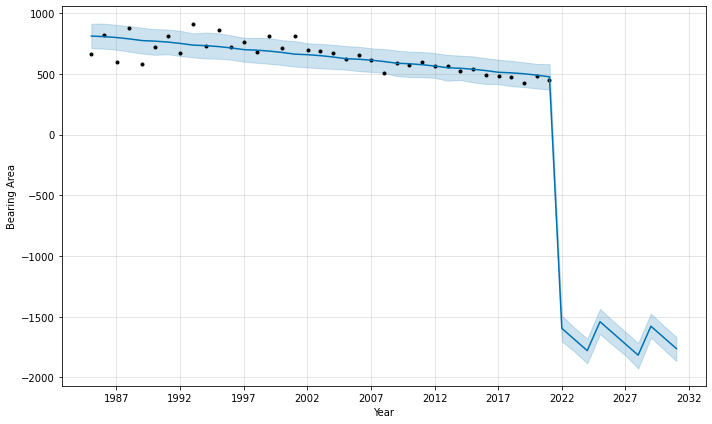

In [38]:
model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Bearing Area')
plt.show()


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
# Extract the actual and predicted values
actual_values = df['y']
predicted_values = forecast['yhat'].values[:len(actual_values)]

In [44]:
# Calculate MAE, MSE, and MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
mape = (abs(actual_values - predicted_values) / actual_values).mean() * 100

In [45]:
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

MAE: 56.16600940106409
MSE: 6402.0015070075615
MAPE: 8.51774582184468


In [47]:
from statsmodels.tools.eval_measures import rmse

In [48]:
rmse(predicted_values,df['y'])

80.01250844091543